系统聚类法
系统聚类法也称为层次聚类法，其基本思想为：开始时将n个样本各自为一类，并规定样本之间的距离和类与类之间的距离，然后将距离最近的两类合并成一个新类，再计算新类与其他类的距离；重复进行两个最近类的合并，每次减少一类，直至所有样本合并成一类。

使用SciPy库cluster模块的hierarchy子模块可以实现系统聚类，该模块下的linkage函数可以实现最短距离法、最长距离法、类平均法和重心法等。
- 最短距离法：定义类与类之间的距离为两类最近样本间的距离，这种系统聚类法称为最短距离法或单连接法（Single Linkage Method）
- 定义类与类之间的距离为两类最远样本间的距离，这种系统聚类法称为最长距离法或完全连接法（Complete Linkage Method），最短距离法和最长距离法的并类步骤的区别在于类间距离的递推公式不同。
- 平均法或平均连接法（Average Linkage Method）有两种定义，一种定义方法是把类与类之间的距离定义为所有样本对之间的平均距离；另一种定义方法是定义类与类之间的平方距离为样本对之间的平方距离的平均值。

scipy.cluster.hierarchy.linkage(y,method='single',metric='euclidean')
y:接受ndarray,表示需要聚类的数据。无默认值

method:接受str,表示计算聚类的方法。默认为single
取值为single时，表示最短距离法；
取值为complete时，表示最长距离法；
取值为average时，表示类平均法；
weighted : 在压缩距离矩阵上执行加权/ WPGMA链接,重心法
centroid：质心距离，把类与类中的质心间距离作为类间距
median：
取值为ward时，表示离差平方和法（ward法）等。

metric:接受特定str或function,表示在y是观测向量集合的情况下使用的计算距离的方法。
取值为euclidean时，表示欧式距离；
取值为minkowski时，表示Minkowski距离；
取值为cityblock时，表示绝对值距离；
取值为cosine时，表示夹角余弦。默认为euclidean

`linkage`对象返回值 Z 为一个维度(n-1)*4的矩阵，记录的是层次聚类每一次的合并信息，里面的 4 个值分别对应合并的两个cluster的序号、两个cluster之间的距离以及本次合并后产生的新的 cluster 所包含的样本点的个数。
Z矩阵的构成一定是一个（n-1）*4的矩阵。前两个元素是每一步合并的两个簇，第三个元素是这些集群之间的距离，第四个元素是合并后的新簇中元素个数。

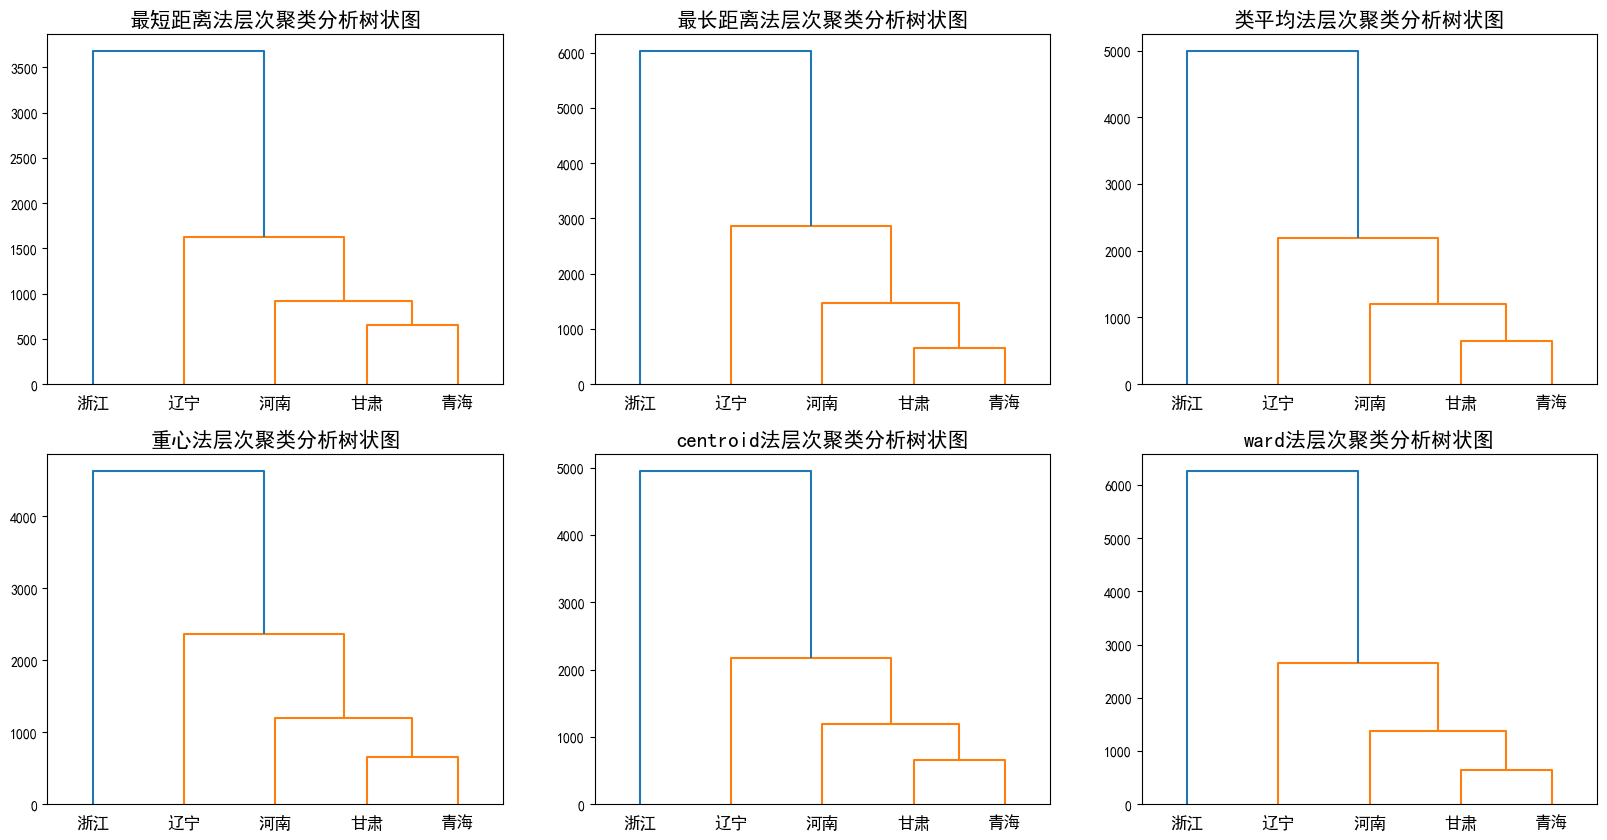

In [1]:
from scipy.cluster import hierarchy
import pandas as pd
import matplotlib.pylab as plt


plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False    # 用来正常显示负号

data = pd.read_csv('例3-4.txt',index_col=0,sep='\t')


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10), dpi=100)
# 最短距离法
Min = hierarchy.linkage(data, method='single')
# 最长距离法
Max =hierarchy.linkage(data, method='complete')
# 类平均法
Ave = hierarchy.linkage(data, method='average')
# 重心法
Weight = hierarchy.linkage(data, method='weighted')
# centroid法
centroid =hierarchy.linkage(data, method='centroid')  # centroid
# median法
# median = hierarchy.linkage(data, method='median')  # median
# ward法
ward = hierarchy.linkage(data, method='ward')  # ward

axes[0,0].set_title("最短距离法层次聚类分析树状图", fontsize=15)
hierarchy.dendrogram(Min,orientation='top',ax=axes[0,0], labels=data.index)
axes[0,1].set_title("最长距离法层次聚类分析树状图", fontsize=15)
hierarchy.dendrogram(Max,orientation='top',ax=axes[0,1], labels=data.index)
axes[0,2].set_title("类平均法层次聚类分析树状图", fontsize=15)
hierarchy.dendrogram(Ave,orientation='top',ax=axes[0,2], labels=data.index)
axes[1,0].set_title("重心法层次聚类分析树状图", fontsize=15)
hierarchy.dendrogram(Weight,orientation='top',ax=axes[1,0], labels=data.index)
axes[1,1].set_title("centroid法层次聚类分析树状图", fontsize=15)
hierarchy.dendrogram(centroid,orientation='top',ax=axes[1,1], labels=data.index)
# hierarchy.dendrogram(median,orientation='top',ax=axes[2,1])
axes[1,2].set_title("ward法层次聚类分析树状图", fontsize=15)
hierarchy.dendrogram(ward,orientation='top',ax=axes[1,2], labels=data.index)

plt.show()

dendrogram(
    Z,  层次聚类编码为树状图的链接矩阵
    truncate_mode=None,  当导出链接的原始观察矩阵很大时，树状图可能难以阅读。该参数用于截断压缩树状图，可选参数None：不截断；level：不会显示超过 p 级别的树状图树（p在下面）。lastp：链接中最后形成的p非单子簇是链接中唯一的非叶子节点；它们对应于 Z 中的 Z[n-p-2:end] 行。所有其他非单例集群都收缩为叶节点。
    p=30,
    color_threshold=None,
    get_leaves=True,
    orientation='top', 绘制树状图的方向，可以是以下任意字符串：'top'；'bottom'；'left'；'right'
    labels=None, count_sort=False, distance_sort=False, show_leaf_counts=True, no_plot=False, no_labels=False, leaf_font_size=None, leaf_rotation=None, leaf_label_func=None, show_contracted=False, link_color_func=None,
    ax=None,  树状图将绘制在给定的Axes实例。
    above_threshold_color='C0')

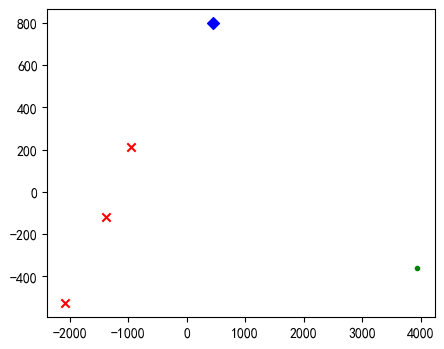

In [4]:
from sklearn.decomposition import PCA  # 加载PCA算法包

# 根据聚类数目返回聚类结果
labels = hierarchy.fcluster(ward, t=3, criterion='maxclust') # 聚类结果
# print(f"平面聚类结果：{labels}")
pca = PCA(n_components=2)  # 加载PCA算法，设置降维后PC数目为2
reduced_x = pca.fit_transform(data)  # 对样本进行降维

# 绘制图形
plt.figure(figsize=(5, 4))
# 聚类的结果可视化，相同的类的样本点用同一种颜色表示
red_x, red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []


for i in range(len(reduced_x)):
  if labels[i] == 1:
    red_x.append(reduced_x[i][0])
    red_y.append(reduced_x[i][1])
  elif labels[i] == 2:
    blue_x.append(reduced_x[i][0])
    blue_y.append(reduced_x[i][1])
  else:
   green_x.append(reduced_x[i][0])
   green_y.append(reduced_x[i][1])

plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x, blue_y, c='b', marker='D')
plt.scatter(green_x, green_y, c='g', marker='.')
plt.show()

在得到了层次聚类的过程信息 Z 后，我们可以使用 fcluster 函数来获取聚类结果。
可以从两个维度来得到距离的结果，一个是指定临界距离 d，得到在该距离以下的未合并的所有 cluster 作为聚类结果；另一个是指定 cluster 的数量 k，函数会返回最后的 k 个 cluster 作为聚类结果。
使用哪个维度由参数 criterion 决定，对应的临界距离或聚类的数量则由参数 t 所记录。
fcluster 函数的结果为一个一维数组，记录每个样本的类别信息。
’inconsistent’：预设的，如果一个集群节点及其所有后代的不一致值小于或等于 t，那么它的所有叶子后代都属于同一个平面集群。当没有非单例集群满足此条件时，每个节点都被分配到自己的集群中。
’distance’：每个簇的距离不超过t

一是在聚类之前我们没法知道合理的聚类的数目或者最大的距离临界值，只有在得到全部的层次聚类信息并对其进行分析后我们才能预估出一个较为合理的数值；二是本次实验的数据集比较简单，所以聚类的结果较好，但对于复杂的数据集（比如非凸的、噪声点比较多的数据集），层次聚类算法有其局限性。

对同一份样本集进行了 cluster 间距离衡量准则分别为 Single-link、Complete-link、UPGMA（Average）和 Ward 的 Agglomerative 层次聚类，取聚类数目为 3。
我们还为每一种聚类产生的结果计算了一个用于评估聚类结果与样本的真实类之间的相近程度的AMI（Adjust Mutual Information）量，该量越接近于 1 则说明聚类算法产生的类越接近于真实情况。

从上面的图和 AMI 量的表现来看，Single-link 方法下的层次聚类结果最差，它几乎将所有的点都聚为一个 cluster，而其他两个 cluster 则都仅包含个别稍微有点偏离中心的样本点，这充分体现了 Single-link 方法下的“链式效应”，也体现了 Agglomerative 算法的一个特点，即“赢者通吃”（rich getting richer）： Agglomerative 算法倾向于聚出不均匀的类，尺寸大的类倾向于变得更大，对于 Single-link 和 UPGMA（Average） 方法尤其如此。由于本次实验的样本集较为理想，因此除了 Single-link 之外的其他方法都表现地还可以，但当样本集变复杂时，上述“赢者通吃” 的特点会显现出来。


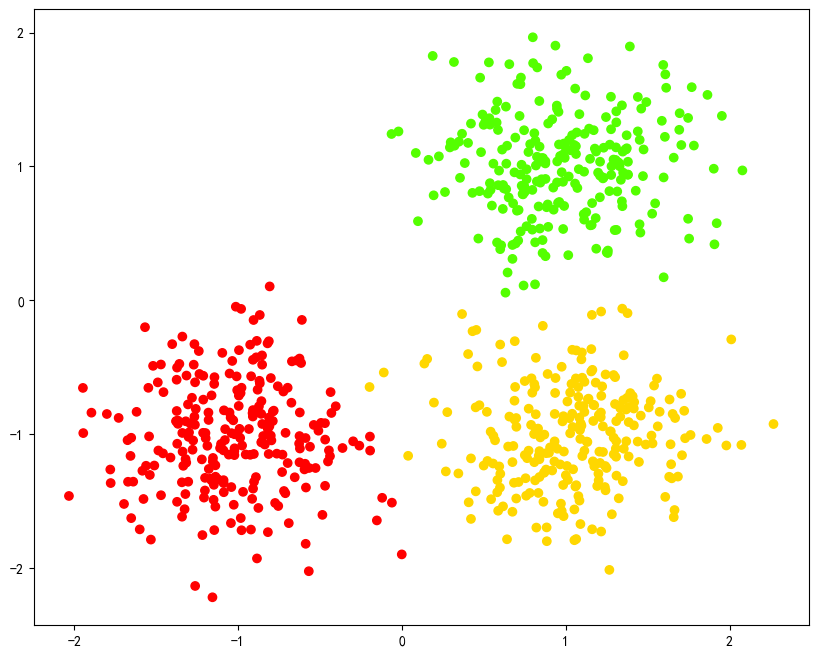

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# 生成样本点
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels = make_blobs(n_samples=750, centers=centers,
                       cluster_std=0.4, random_state=0)

clustering = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X)
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, cmap='prism')
plt.show()